In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

from fsl_mrs.utils import mrs_io,misc

datafile  = '/Users/saad/Desktop/Spectroscopy/MRSIExamples/LargeFov/FID_Metab.nii.gz'
maskfile  = '/Users/saad/Desktop/Spectroscopy/MRSIExamples/LargeFov/voxInVOI.nii.gz'
basisfile = '/Users/saad/Desktop/Spectroscopy/MRSIExamples/3T_slaser_32vespa_1250.BASIS'

data_hdr = nib.load(datafile)
mask_hdr = nib.load(maskfile)

numPoints  = data_hdr.shape[-1]
data       = np.asanyarray(data_hdr.dataobj)
mask       = np.asanyarray(mask_hdr.dataobj) 

basis, names, basisheader = mrs_io.readLCModelBasis(basisfile,numPoints)
numBasis                  = basis.shape[1]


cf = 123.2274e6
bw = 1/.0008


if data.shape[:3] != mask.shape:
    mask = mask[:,:,None]
fid_list = misc.volume_to_list(data,mask)




In [3]:
from fsl_mrs.core import MRS
from fsl_mrs.utils import fitting
import warnings
warnings.filterwarnings("ignore")

# Create MRS object
i,j  = 30,20 #np.random.randint(mask.shape[0]),np.random.randint(mask.shape[1])
FID  = np.conj(data[i,j,0,:].flatten())
args = {'FID'   : FID,
        'basis' : basis,
        'names' : names,
        'bw'    : bw,
        'cf'    : cf}
mrs  = MRS(**args)


numBasis = len(names)
metab_groups = [0]*numBasis

# n = mrs.add_MM_peaks()
# new_metab_groups = [i+max(metab_groups)+1 for i in range(n)]
# metab_groups = metab_groups + new_metab_groups


# Fit 
Fitargs = {'method':'Newton',
          'baseline_order':2,
          'ppmlim':(.2,4.2),'metab_groups':metab_groups}
res = fitting.fit_FSLModel(mrs,**Fitargs)


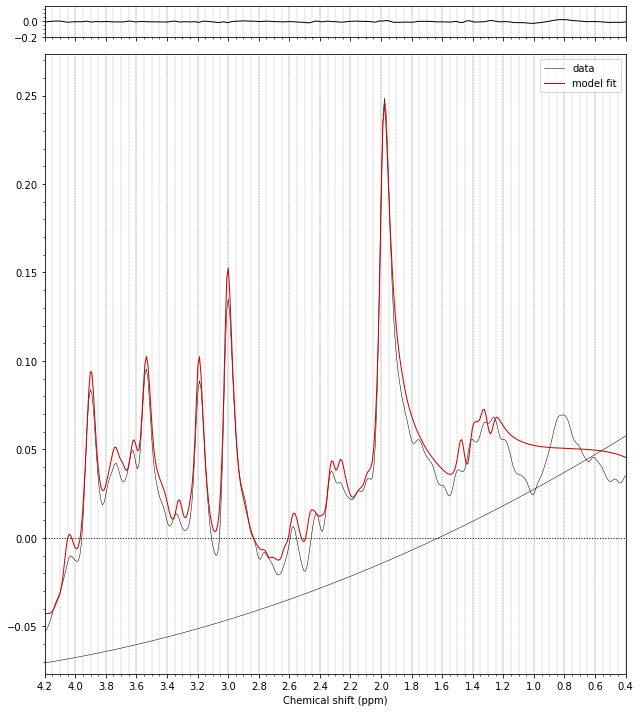

In [4]:
# Plot fit
from fsl_mrs.utils import plotting
_ = plotting.plot_fit(mrs,pred=res.pred,baseline=res.baseline,proj='real')


In [ ]:
res.conc[mrs.names.index('NAA')]